In [199]:
import pandas as pd
import pickle
import numpy as np
import datetime

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB 
from sklearn.decomposition import RandomizedPCA,PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.lda import LDA
from sklearn.qda import QDA

from sklearn.pipeline import make_pipeline
# from sklearn import svm
from scipy.stats import mode
from sklearn.cross_validation import cross_val_score

import seaborn as sns
from seaborn import plt

%matplotlib inline

In [3]:
train = pd.DataFrame(pickle.load(open('/Volumes/flash/compology/image_data/train_gl_nn_data.pickle','r')))

In [4]:
test = pd.DataFrame(pickle.load(open('/Volumes/flash/compology/image_data/test_gl_nn_data.pickle','r')))

In [5]:
class ProcessTimer:
  def __init__(self):
    self.startTime = datetime.datetime.now()
  def start(self,functionResponse,name=""):
    endTime = datetime.datetime.now()
    self.delta = (endTime - self.startTime)
    print "{} Time |{}|".format(name,self.delta.seconds)
    return functionResponse

In [6]:
X_train = list(train['pixel_data'][:].values)
y_train = list(train['label'][:].values)

X_test = list(test['pixel_data'].values)
y_test = list(test['label'].values)
print len(X_train),len(X_test)

12087 5181


In [21]:
pca = PCA(n_components=200)
X_train = pca.fit_transform(list(train['pixel_data'].values))
X_test = pca.transform(list(test['pixel_data'].values))

# KNN Classifier

In [27]:
n_neighbors = range(9, 61, 2)
print len(n_neighbors)
print n_neighbors

26
[9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59]


In [28]:
scores = []
for n in n_neighbors:
    clf = KNeighborsClassifier(n,weights='distance') # weights='uniform'
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
#     print str(n),"|",score
    scores.append(score)

9 | 0.349932445474
11 | 0.354564755839
13 | 0.355336807566
15 | 0.358232001544
17 | 0.359776104999
19 | 0.356494885157
21 | 0.355915846362
23 | 0.358425014476
25 | 0.359390079135
27 | 0.358425014476
29 | 0.363250337773
31 | 0.362478286045
33 | 0.367303609342
35 | 0.365952518819
37 | 0.369619764524
39 | 0.364408415364
41 | 0.368268674001
43 | 0.369812777456
45 | 0.370970855047
47 | 0.368654699865
49 | 0.367689635206
51 | 0.367303609342
53 | 0.369426751592
55 | 0.36711059641
57 | 0.365952518819
59 | 0.365952518819


0.370970855047
Optimal N: 45


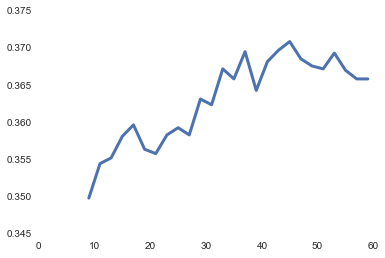

In [35]:
plt.plot(n_neighbors, scores, linewidth=3.0)
print np.asarray(scores).max()
for i,s in enumerate(scores): 
    if s==np.asarray(scores).max(): print "Optimal N: {}".format(n_neighbors[i])

In [36]:
clf = KNeighborsClassifier(45,weights='distance')
clf.fit(X_train, y_train)
print "KNN by distance: {}".format(clf.score(X_test, y_test))

clf = KNeighborsClassifier(45,weights='uniform')
clf.fit(X_train, y_train)
print "KNN uniform: {}".format(clf.score(X_test, y_test))

KNN by distance: 0.370970855047
KNN uniform: 0.364601428296


### FINDINGS: KNN Classifier
1. N = 45
2. weights = distance

# Logistic Regression Classifier

In [37]:
# normalization penalty
cValues = [0.001, 0.01, 0.1, 1, 10, 100, 1000,1000,10000]

In [40]:
lrScores = []
for c in cValues:
    lr = LogisticRegression(C=c,penalty='l2')
    lr.fit(X_train,y_train)
    score = lr.score(X_test,y_test)
    print str(c),",",score
    lrScores.append(score)

0.001 , 0.385639837869
0.01 , 0.388342018915
0.1 , 0.390079135302
1 , 0.385832850801
10 , 0.385832850801
100 , 0.385253812005
1000 , 0.385060799074
1000 , 0.385060799074
10000 , 0.385060799074


In [41]:
for c in cValues:
    lr = LogisticRegression(C=c,penalty='l2',class_weight='auto')
    lr.fit(X_train,y_train)
    score = lr.score(X_test,y_test)
    print str(c),",",score

0.001 , 0.364215402432
0.01 , 0.377726307663
0.1 , 0.379656436981
1 , 0.377919320594
10 , 0.375217139548
100 , 0.375217139548
1000 , 0.375217139548
1000 , 0.375217139548
10000 , 0.375217139548


In [43]:
for i,s in enumerate(lrScores): 
    if s==np.asarray(lrScores).max(): print "Optimal N: {}".format(cValues[i])

Optimal N: 0.1


### FINDINGS Logistic Regression
1. penalty = 'l2'
2. unweighted had higher accuracy, likely due to distribution of test.. but will use auto class weight
3. c=0.1

# Decision Tree Classifier

In [44]:
from sklearn.grid_search import GridSearchCV

In [52]:
dtcScores = []
for d in [1,2,3,4,5,6,7,None]: # tree depth
    dtc = DecisionTreeClassifier(max_depth=d) 
    dtc.fit(X_train,y_train)
    score = dtc.score(X_test,y_test)
    print str(d),",",score
    dtcScores.append(score)

1 , 0.199961397414
2 , 0.225053078556
3 , 0.247635591585
4 , 0.270604130477
5 , 0.286624203822
6 , 0.289905423663
7 , 0.278710673615
None , 0.258830341633


### FINDINGS Decision Tree
1. max_depth = 6

# AdaBoost

In [57]:
# ABC
abcScores = []
for n in [10,20,30,40,50,60,70]: # number of estimators
    abc = AdaBoostClassifier(n_estimators=n, random_state=1)
    abc.fit(X_train,y_train)
    score = abc.score(X_test,y_test)
    print str(n),",",score
    abcScores.append(score)

10 , 0.271183169272
20 , 0.281991893457
30 , 0.293958695233
40 , 0.275815479637
50 , 0.277359583092
60 , 0.278517660683
70 , 0.278903686547


In [58]:
## boosted tree
bdtcScores = []
for n in [10,20,30,40,50,60,70]:
    bdtc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6),n_estimators=n)
    bdtc.fit(X_train,y_train)
    score = bdtc.score(X_test,y_test)
    print str(n),",",score
    bdtcScores.append(score)

None , 0.268480988226
None , 0.265971820112
None , 0.262497587338
None , 0.241845203629
None , 0.238756996719
None , 0.241266164833
None , 0.249951746767


### Boosted Tree Findings:
1. max_depth = None
2. n_estimators = 30

# Random Forest

In [59]:
rfcScores = []
print "Random forest, number of estimators:"
for n in [10,20,30,40,50,60,70]: #number of estimators
    rfc = RandomForestClassifier(max_depth=5, n_estimators=n, random_state=1)
    rfc.fit(X_train,y_train)
    score = rfc.score(X_test,y_test)
    print str(n),",",score
    rfcScores.append(score)


Random forest, number of estimators:
10 , 0.247635591585
20 , 0.264427716657
30 , 0.262497587338
40 , 0.263848677861
50 , 0.265006755453
60 , 0.266164833044
70 , 0.266743871839


In [60]:
rfcScores = []
print "Random forest, max depth:"
for d in [1,2,3,4,5,6,7,None]: # tree depth
    rfc = RandomForestClassifier(max_depth=d, n_estimators=30, random_state=1)
    rfc.fit(X_train,y_train)
    score = rfc.score(X_test,y_test)
    print str(d),",",score
    rfcScores.append(score)


Random forest, max depth:
1 , 0.20266357846
2 , 0.218104613009
3 , 0.233352634627
4 , 0.247828604517
5 , 0.262497587338
6 , 0.275622466705
7 , 0.283149971048
None , 0.309592742714


### FINDINGS Random Forest Classifier
1. Max depth = None
2. n_estimators = 30

# Linear SVC

In [208]:
# Linear SVC
lsvclf = SVC(kernel="linear", C=0.025)
ProcessTimer().start(lsvclf.fit(X_train,y_train))
print "Linear SVC Score: {}".format(lsvclf.score(X_test,y_test))

 Time |45|
Linear SVC Score: 0.401080872418


In [ ]:
# 

In [211]:
# additional tests
svcclf = SVC(gamma=2, C=1)
ProcessTimer().start(svcclf.fit(X_train,y_train))
print "SVC Score: {}".format(svcclf.score(X_test,y_test))

 Time |107|
SVC Score: 0.160779772245


# Linear discrimant analysis (LDA)

In [209]:
ldaclf = LDA()
ProcessTimer().start(ldaclf.fit(X_train,y_train))
print "LDA Score: {}".format(ldaclf.score(X_test,y_test))


 Time |0|
LDA Score: 0.410731519012


# Quadratic Discriminant Analysis (QDA)

In [216]:
qdaclf = QDA()
ProcessTimer().start(qdaclf.fit(X_train,y_train))
print "QDA Score: {}".format(qdaclf.score(X_test,y_test))


 Time |0|
QDA Score: 0.357652962749


In [21]:
# bdt_discrete = AdaBoostClassifier(
#     DecisionTreeClassifier(max_depth=2),
#     n_estimators=600,
#     learning_rate=1.5,
#     algorithm="SAMME")
# bdt_discrete.fit(Xtrain,y_train)
# print 'Boosted Tree accuracy: {}'.format(bdt_discrete.score(Xtest,y_test))

Boosted Tree accuracy: 0.298011966802


In [212]:
clfPip = make_pipeline(PCA(n_components=200),LogisticRegression(C=0.1,class_weight='auto',penalty='l2'))
print testClf
clfPip.fit(list(train['pixel_data'][:].values),list(train['label'][:].values))
print "PCA / LOG Pipeline score: {}".format(clfPip.score(list(test['pixel_data'][:].values),list(test['label'][:].values)))

Pipeline(steps=[('pca', PCA(copy=True, n_components=200, whiten=False)), ('logisticregression', LogisticRegression(C=0.1, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001))])
PCA / LOG Pipeline score: 0.379656436981
